In [1]:
import matplotlib.pyplot as plt
import numpy as np
from time import time
import random

# Esercizio 1

In [2]:
seed = 0
random.seed(a= seed)
t = time()
def Maxwell(E, B=10, T=2):
    return np.sqrt(E-B)*np.exp(-E/T)

x_0= int(input("specifica un punto di partenza: "))
delta = float(input("Inserisci l'estremo dell'intervallo simmetrico di delta: "))
l = int(input("specifica un limite superiore: "))

specifica un punto di partenza: 20
Inserisci l'estremo dell'intervallo simmetrico di delta: 0.5
specifica un limite superiore: 30


In [3]:
def iterate(n, B=10, width = delta , l=l):
    occurrences = np.zeros(int(abs(B-l)/width))
    X = np.arange(B, l, width)  
    x = x_0
    somma= 0
    quadsum = 0
    for i in range(n):
        delta_i = -delta + (delta+delta)*random.random()
        x_trial= x + delta_i
        if x_trial>=B and x_trial<l:
            w = Maxwell(x_trial)/Maxwell(x)
            if w >= 1:
                x = x_trial
            else:
                r = random.random()
                if r <= w:
                    x = x_trial
                else:
                    x = x
        else:
            x=x
        occurrences[int((x-B)/width)]+=1
        somma += x
        quadsum += x**2
    ax1.bar(X, occurrences)
    media = somma/n
    varianza = (quadsum-n*media**2)/(n-1)
    massimo = np.max(occurrences)
    return media, varianza, massimo


def pesato(n, B=10, width = delta , l=l):
    occurrences = np.zeros(int(abs(B-l)/width))
    X = np.arange(B, l, width)  
    counter = np.zeros(int(abs(B-l)/width))
    quadsums = np.zeros(int(abs(B-l)/width))
    for i in range(n):
        x = random.random()*(l-B)+B
        px = Maxwell(x)
        occurrences[int((x-B)/width)]+=px
        counter[int((x-B)/width)]+=1
        quadsums[int((x-B)/width)]+=px**2
    means = []
    variances = []
    relatives = []
    for i in range(len(occurrences)):
        mean = occurrences[i]/counter[i]
        variance = np.sqrt((quadsums[i]-counter[i]*mean**2)/(counter[i]-1))
        means.append(mean*counter[i])
        variances.append(variance*counter[i])
        relatives.append(variance/mean)
    
    ax2.bar(X, occurrences, alpha=0.3)
    return X, occurrences, means, variances, relatives

media (metropolis):  13.040703512445669 varianza(metropolis):  0.06635887261573341


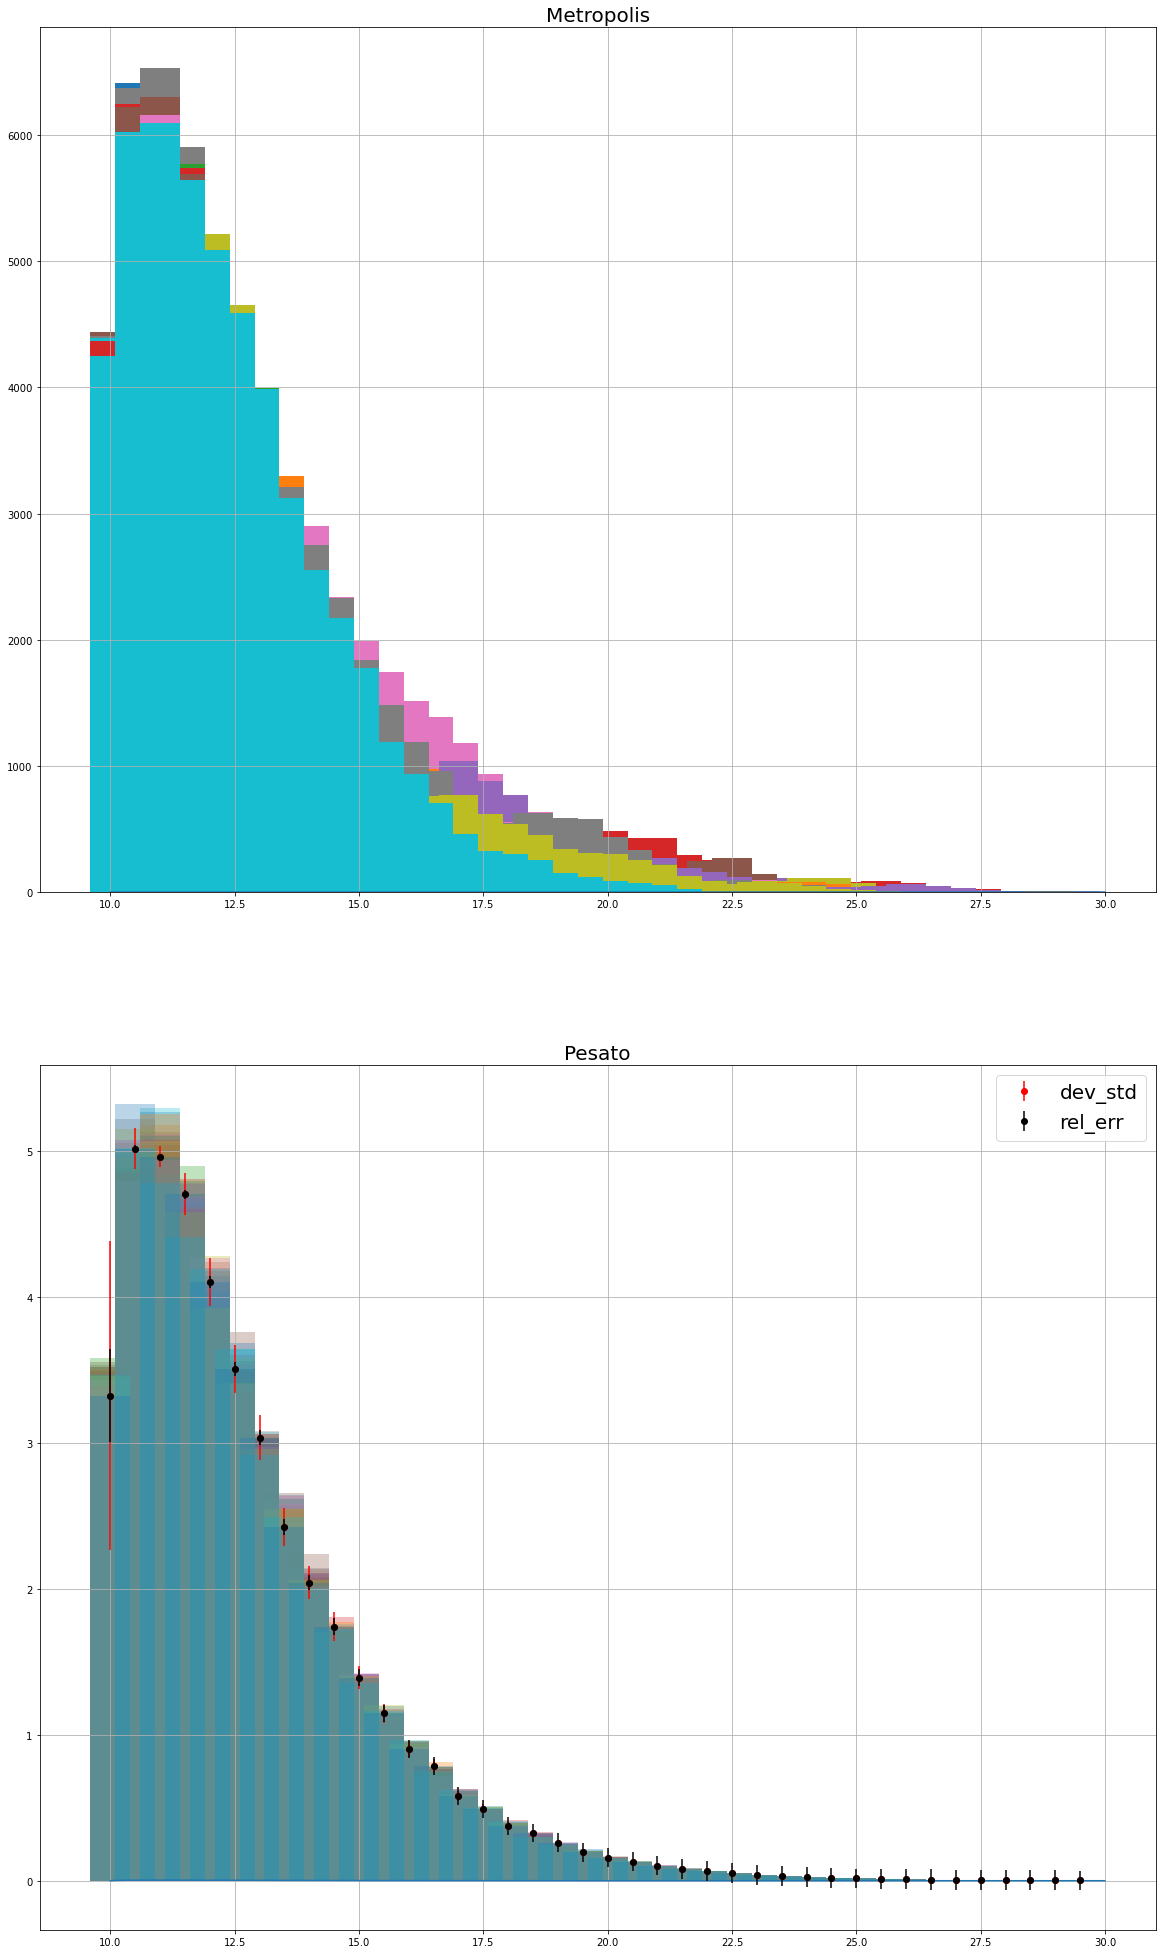

Tempo impiegato:  13.847339391708374 (s)


In [4]:
fig, (ax1,ax2)=plt.subplots(2, 1, figsize = (20, 35))
B=10
somma_medie=0
quadsum_medie=0
for i in range(20):
    t5=iterate(50000)
    tp=pesato(50000)
    somma_medie += t5[0]
    quadsum_medie += t5[0]**2
    
p = pesato(50000)

ax1.plot(np.linspace(B, 30, 200), Maxwell(np.linspace(B, 30, 200)))
ax2.plot(np.linspace(B, 30, 200), Maxwell(np.linspace(B, 30, 200)))
ax2.errorbar(p[0], p[2], p[3], fmt="o", c="r", label="dev_std")
ax2.errorbar(p[0], p[2], p[4], fmt="o", c= "black", label="rel_err")

media_medie = somma_medie/20
varianza_varianze = (quadsum_medie-20*media_medie**2)/(20-1)
print("media (metropolis): ", media_medie, "varianza(metropolis): ", varianza_varianze)

ax1.set_title("Metropolis", size = 20)
ax2.set_title("Pesato", size = 20)
ax1.grid()
ax2.grid()
ax2.legend(fontsize = 20)
plt.show()

t2 = time()
print("Tempo impiegato: ", t2-t, "(s)")

# Esercizio 2

In [20]:
t = time()
L = 0.01
def pesato(L=L):
    T = int(10e+6)
    #T = 100
    sigma_s, sigma_c = 10, 700
    sigma_tot = sigma_s+sigma_c
    N_c = 0
    N_t=0
    N_r=0
    N_tot = 0
    while N_tot<T:
        k = 0
        x = 0
        mu = 1
        w = 1
        while True:
            nu = random.random()
            lam = -np.log(nu)/sigma_tot
            x_next = x + lam*mu
            if x_next >= L:
                N_t+=w
                N_tot+=N_t
                break
            elif x_next<=0:
                N_r+=w
                N_tot+=N_r
                break
            else:
                N_c+= w*sigma_s/sigma_tot
                N_tot += N_c
                w = w*sigma_s/sigma_tot
                mu = 2*random.random()-1
                k+=1
                x = x_next
        #print(N_t+N_r+N_c, N_tot)
    p_t, p_r, p_c = N_t/N_tot, N_r/N_tot, N_c/N_tot
    return p_t, p_r, p_c
            
        
print(pesato())       

(6.08551467724306e-07, 1.9733343953440603e-06, 1.2969952465478147e-05)
